# Step 1: Import Necessary Libraries

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define paths
DATASET_PATH = "../../dataset"
CATEGORIES = ["with_mask", "without_mask"]
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10

# Step 2: Load and Preprocess the Dataset

In [ ]:
def load_dataset():
    """Load images and labels from dataset directory"""
    images, labels = [], []

    for label, category in enumerate(CATEGORIES):
        folder_path = os.path.join(DATASET_PATH, category)
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = keras.preprocessing.image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load dataset
X, y = load_dataset()

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

c:\Users\offic\OneDrive\Desktop\Work Env\Semester-6\VR\Projects\venv\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


# Step 3: Define the CNN Model

In [ ]:
def create_model(activation="relu", optimizer="adam"):
    """Creates and returns a CNN model"""
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation, input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(128, activation=activation),
        layers.Dense(1, activation="sigmoid")  # Binary classification
    ])

    model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=["accuracy"])

    return model

# Create model
model = create_model()
model.summary()

c:\Users\offic\OneDrive\Desktop\Work Env\Semester-6\VR\Projects\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

# Step 4: Train the Model

In [4]:
history = model.fit(X_train, y_train,validation_data=(X_val, y_val),epochs=EPOCHS,batch_size=BATCH_SIZE)

# Save the trained model
model.save("mask_detector_model.h5")

Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 53s 483ms/step - accuracy: 0.7411 - loss: 0.5679 - val_accuracy: 0.9072 - val_loss: 0.2423
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 53s 518ms/step - accuracy: 0.9146 - loss: 0.2423 - val_accuracy: 0.9341 - val_loss: 0.2089
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 47s 453ms/step - accuracy: 0.9394 - loss: 0.1705 - val_accuracy: 0.9463 - val_loss: 0.1460
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 46s 443ms/step - accuracy: 0.9503 - loss: 0.1308 - val_accuracy: 0.9487 - val_loss: 0.1405
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 47s 452ms/step - accuracy: 0.9646 - loss: 0.1003 - val_accuracy: 0.9243 - val_loss: 0.1632
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 55s 536ms/step - accuracy: 0.9653 - loss: 0.0953 - val_accuracy: 0.9609 - val_loss: 0.1439
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 79s 772ms/step - accuracy: 0.9730 - loss: 0.0763 - val_accuracy: 0.9609 - val_loss: 0.0992
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 100s 966ms/step - accuracy: 0.9815 - loss: 

# Step 5: Evaluate and Visualize Results

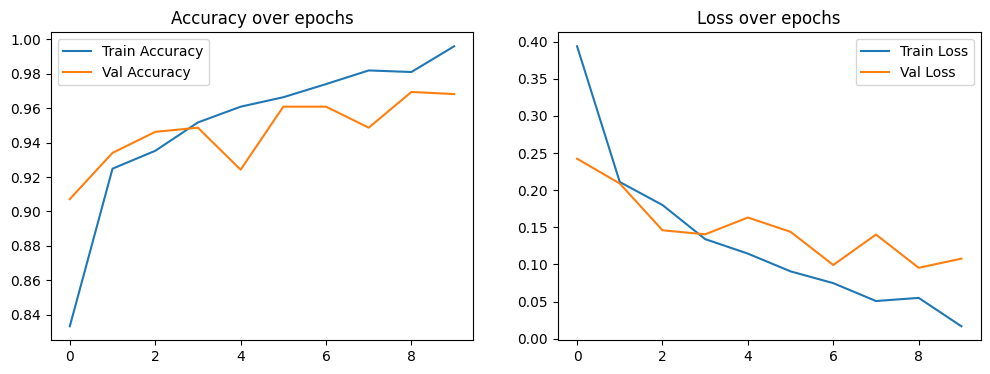

In [ ]:
# Plot training accuracy and loss
def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.legend()
    plt.title("Accuracy over epochs")

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.legend()
    plt.title("Loss over epochs")

    plt.show()

plot_history(history)

# Step 6: Hyperparameter Tuning


Training with activation=relu and optimizer=adam
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 67s 639ms/step - accuracy: 0.7367 - loss: 0.5755 - val_accuracy: 0.9072 - val_loss: 0.2254
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 70s 676ms/step - accuracy: 0.9286 - loss: 0.1984 - val_accuracy: 0.9341 - val_loss: 0.1863
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 75s 728ms/step - accuracy: 0.9359 - loss: 0.1663 - val_accuracy: 0.9389 - val_loss: 0.1827
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 78s 759ms/step - accuracy: 0.9411 - loss: 0.1403 - val_accuracy: 0.9341 - val_loss: 0.1596
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 672ms/step - accuracy: 0.9515 - loss: 0.1176 - val_accuracy: 0.9524 - val_loss: 0.1474
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 52s 503ms/step - accuracy: 0.9648 - loss: 0.0986 - val_accuracy: 0.9646 - val_loss: 0.1117
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 55s 535ms/step - accuracy: 0.9750 - loss: 0.0772 - val_accuracy: 0.9487 - val_loss: 0.1716
Epoch 8/10
103/103 ━━━━━━━━━━━━━━

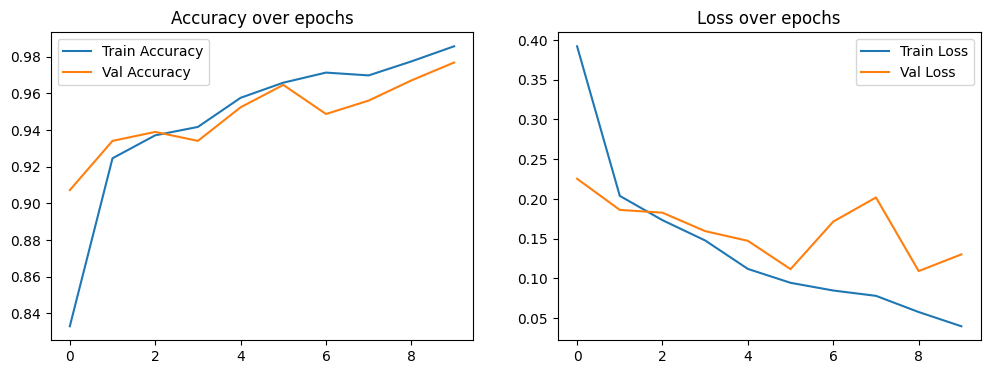


Training with activation=tanh and optimizer=adam
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 85s 808ms/step - accuracy: 0.6343 - loss: 1.1440 - val_accuracy: 0.8779 - val_loss: 0.3472
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 74s 715ms/step - accuracy: 0.8653 - loss: 0.3560 - val_accuracy: 0.8657 - val_loss: 0.3446
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 72s 695ms/step - accuracy: 0.8868 - loss: 0.2950 - val_accuracy: 0.9023 - val_loss: 0.2859
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 69s 675ms/step - accuracy: 0.9002 - loss: 0.2611 - val_accuracy: 0.8950 - val_loss: 0.2675
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 72s 696ms/step - accuracy: 0.9125 - loss: 0.2174 - val_accuracy: 0.9084 - val_loss: 0.2426
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 81s 785ms/step - accuracy: 0.9152 - loss: 0.2078 - val_accuracy: 0.8974 - val_loss: 0.2628
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9070 - loss: 0.2477 - val_accuracy: 0.9060 - val_loss: 0.2660
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━━

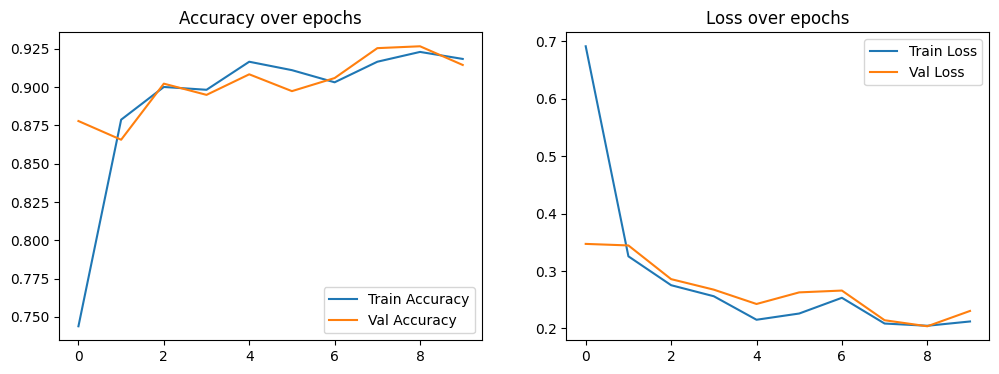


Training with activation=relu and optimizer=sgd
Epoch 1/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 94s 856ms/step - accuracy: 0.5851 - loss: 0.6736 - val_accuracy: 0.8400 - val_loss: 0.5281
Epoch 2/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 779ms/step - accuracy: 0.7310 - loss: 0.5356 - val_accuracy: 0.8559 - val_loss: 0.3799
Epoch 3/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 68s 655ms/step - accuracy: 0.8711 - loss: 0.3447 - val_accuracy: 0.8718 - val_loss: 0.3342
Epoch 4/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 61s 586ms/step - accuracy: 0.8875 - loss: 0.3101 - val_accuracy: 0.7326 - val_loss: 0.5526
Epoch 5/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 781ms/step - accuracy: 0.8791 - loss: 0.3038 - val_accuracy: 0.8901 - val_loss: 0.3047
Epoch 6/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 80s 776ms/step - accuracy: 0.8948 - loss: 0.2714 - val_accuracy: 0.8926 - val_loss: 0.2918
Epoch 7/10
103/103 ━━━━━━━━━━━━━━━━━━━━ 82s 796ms/step - accuracy: 0.9067 - loss: 0.2437 - val_accuracy: 0.8645 - val_loss: 0.3137
Epoch 8/10
103/103 ━━━━━━━━━━━━━━━

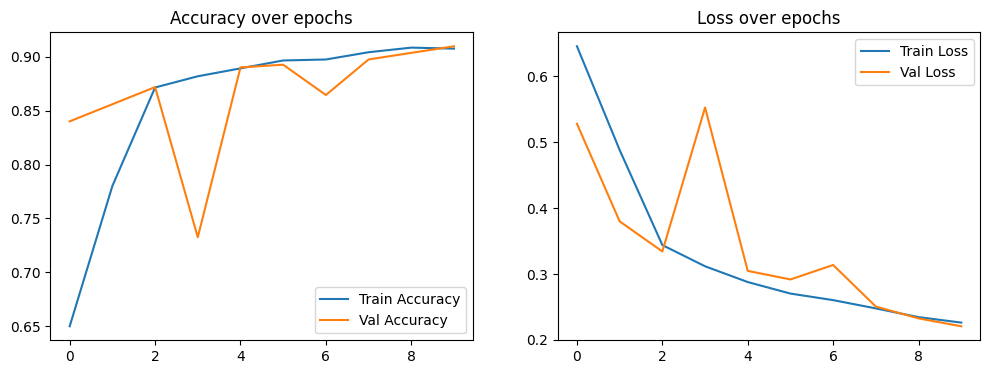

In [ ]:
configs = [
    {"activation": "relu", "optimizer": "adam"},
    {"activation": "tanh", "optimizer": "adam"},
    {"activation": "relu", "optimizer": "sgd"},
]

for config in configs:
    print(f"\nTraining with activation={config['activation']} and optimizer={config['optimizer']}")
    model = create_model(activation=config["activation"], optimizer=config["optimizer"])
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=EPOCHS, batch_size=BATCH_SIZE)
    plot_history(history)
